Employees Performance Case Study

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Test_data.csv')

In [5]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [27]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.248744,34.782929,3.312984,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.564220,7.679492,1.216959,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,4.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [9]:
print(df.isnull().sum())

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


In [11]:
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [13]:
print(df.isnull().sum())

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


In [15]:
df['previous_year_rating'].fillna(3.0, inplace=True)

In [17]:
print(df.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64


In [29]:
df['no_of_trainings'] = df['no_of_trainings'].apply(lambda x: 4 if x > 4 else x)

                      employee_id  no_of_trainings       age  \
employee_id              1.000000        -0.002315  0.000920   
no_of_trainings         -0.002315         1.000000 -0.088220   
age                      0.000920        -0.088220  1.000000   
previous_year_rating    -0.005544        -0.048968  0.037746   
length_of_service        0.011781        -0.061364  0.644515   
KPIs_met >80%            0.006285        -0.040690 -0.027661   
awards_won?              0.000118         0.001478 -0.005457   
avg_training_score      -0.011735         0.050530 -0.035823   

                      previous_year_rating  length_of_service  KPIs_met >80%  \
employee_id                      -0.005544           0.011781       0.006285   
no_of_trainings                  -0.048968          -0.061364      -0.040690   
age                               0.037746           0.644515      -0.027661   
previous_year_rating              1.000000           0.027444       0.334821   
length_of_service      

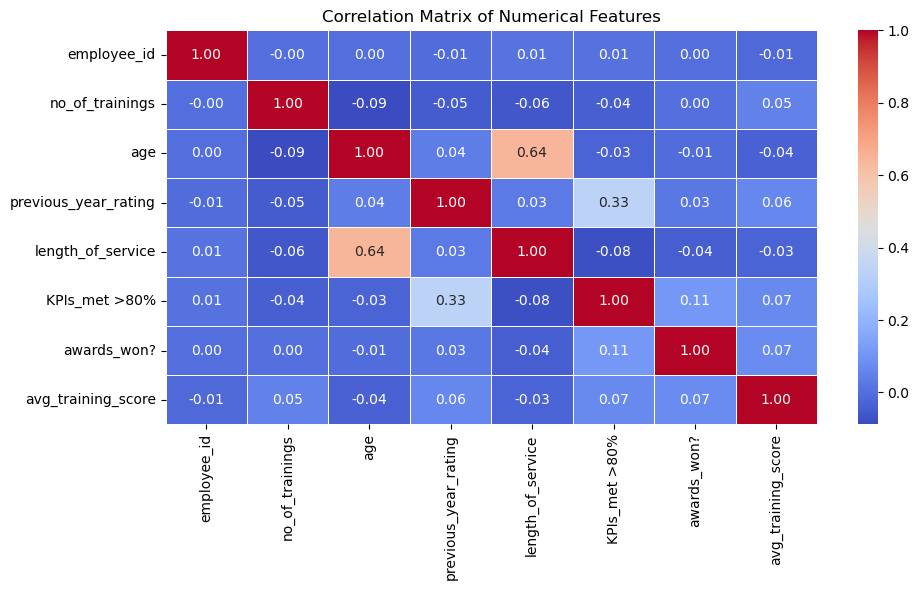

In [31]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

In [33]:
correlation_matrix['avg_training_score'].sort_values(ascending=False)

avg_training_score      1.000000
awards_won?             0.073857
KPIs_met >80%           0.072981
previous_year_rating    0.060751
no_of_trainings         0.050530
employee_id            -0.011735
length_of_service      -0.028643
age                    -0.035823
Name: avg_training_score, dtype: float64

In [35]:
# Create binary flags for each performance component
cond1 = df['avg_training_score'] >= 80
cond2 = df['awards_won?'] == 1
cond3 = df['KPIs_met >80%'] == 1

# Sum the number of conditions met
df['performance_score'] = cond1.astype(int) + cond2.astype(int) + cond3.astype(int)

# Final high performer label: 1 if at least 2 out of 3 are true
df['is_high_performer'] = (df['performance_score'] >= 2).astype(int)

# Optional: Drop the helper column
df.drop(columns='performance_score', inplace=True)


In [37]:
print(df.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_high_performer       0
dtype: int64


In [39]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

binary_categoricals = ['KPIs_met >80%', 'awards_won?']
categorical_cols += binary_categoricals

categorical_cols = [col for col in categorical_cols if col != 'employee_id']

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in binary_categoricals + ['employee_id']]

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['department', 'region', 'education', 'gender', 'recruitment_channel', 'KPIs_met >80%', 'awards_won?']
Numerical columns: ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']


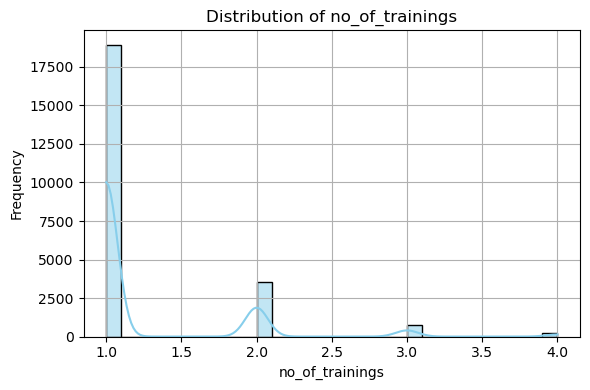

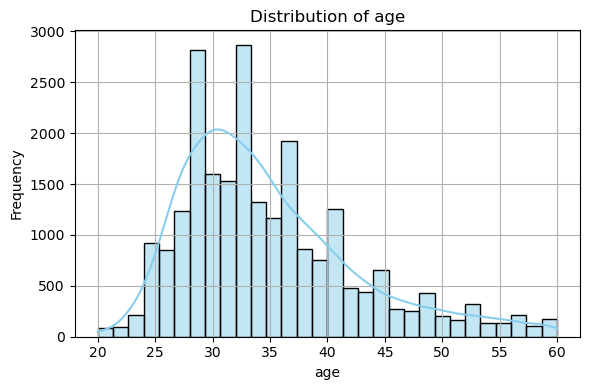

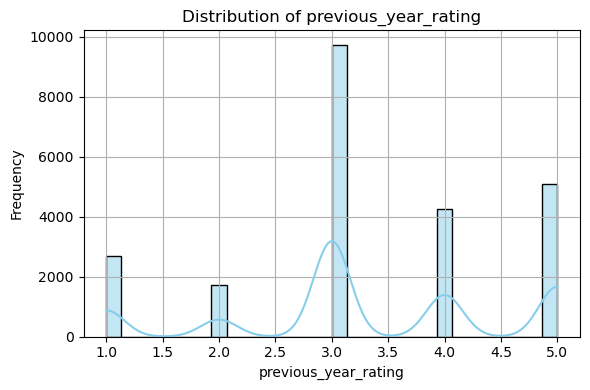

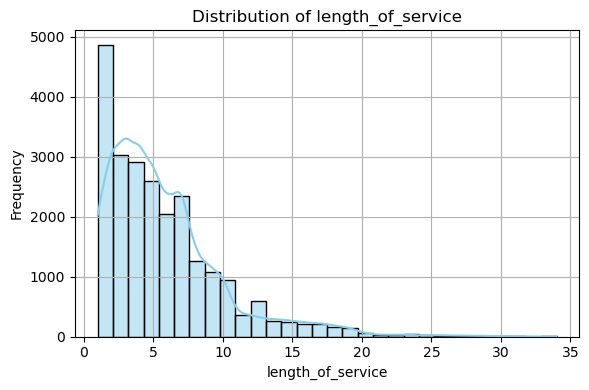

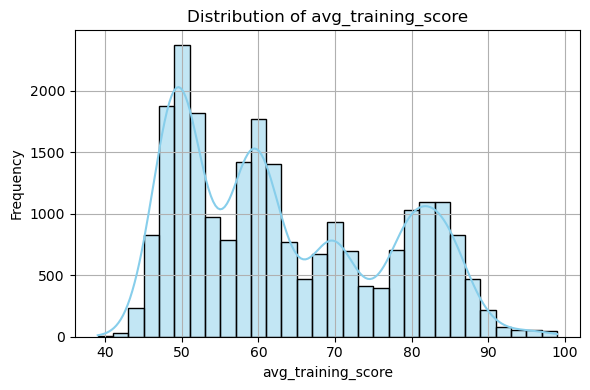

In [41]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

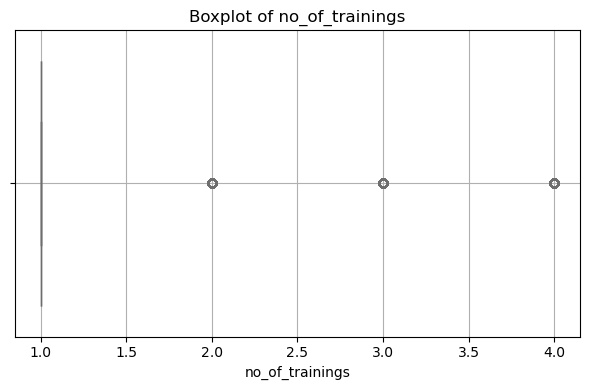

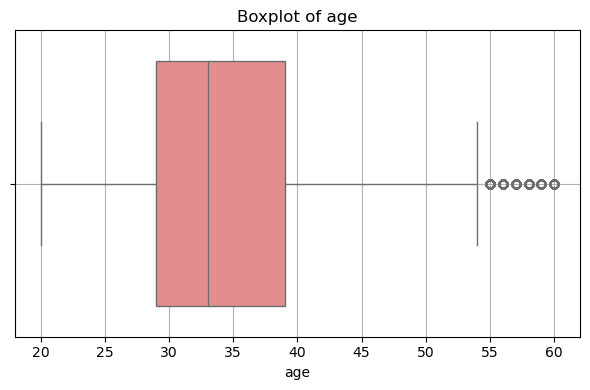

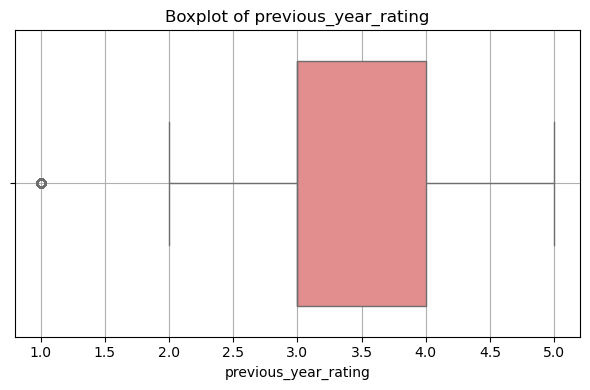

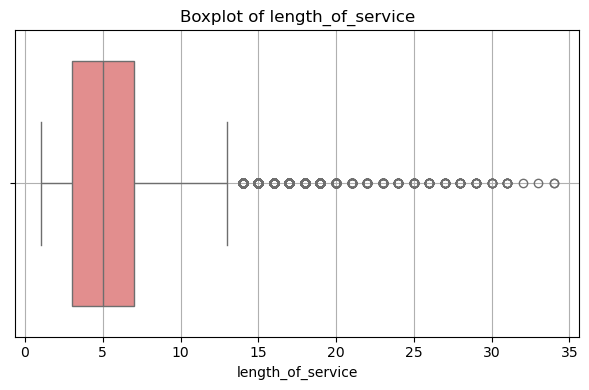

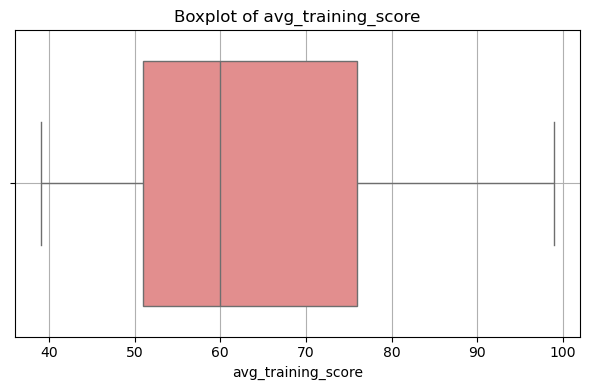

In [43]:
# Plot boxplots for numerical columns to check outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [45]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

columns_to_check = [
    'no_of_trainings',
    'age',
    'previous_year_rating',
    'length_of_service',
    'avg_training_score'
]

outliers_dict = {}

for column in columns_to_check:
    outliers = detect_outliers_iqr(df, column)
    outliers_dict[column] = outliers
    print(f"Number of outliers in '{column}': {len(outliers)}")
    print("-" * 30)

Number of outliers in 'no_of_trainings': 4562
------------------------------
Number of outliers in 'age': 627
------------------------------
Number of outliers in 'previous_year_rating': 2680
------------------------------
Number of outliers in 'length_of_service': 1485
------------------------------
Number of outliers in 'avg_training_score': 0
------------------------------


In [55]:
df['no_of_trainings'] = np.where(df['no_of_trainings'] > 5, 5, df['no_of_trainings'])

In [53]:
df['length_of_service'] = np.log1p(df['length_of_service'])

In [57]:
df['age'] = np.where(df['age'] > 60, 60, df['age'])

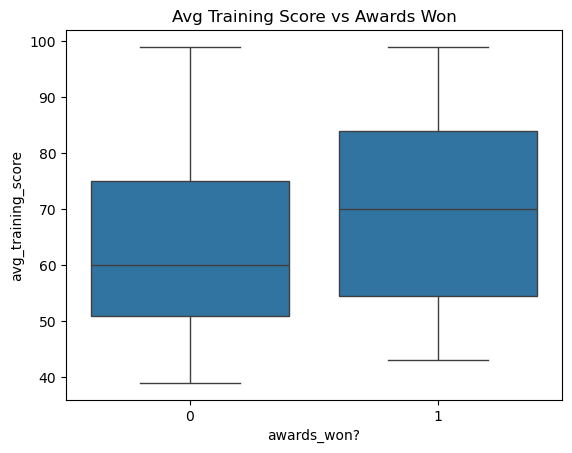

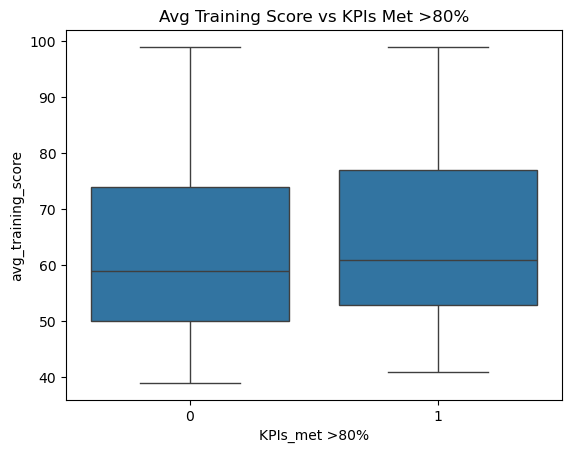

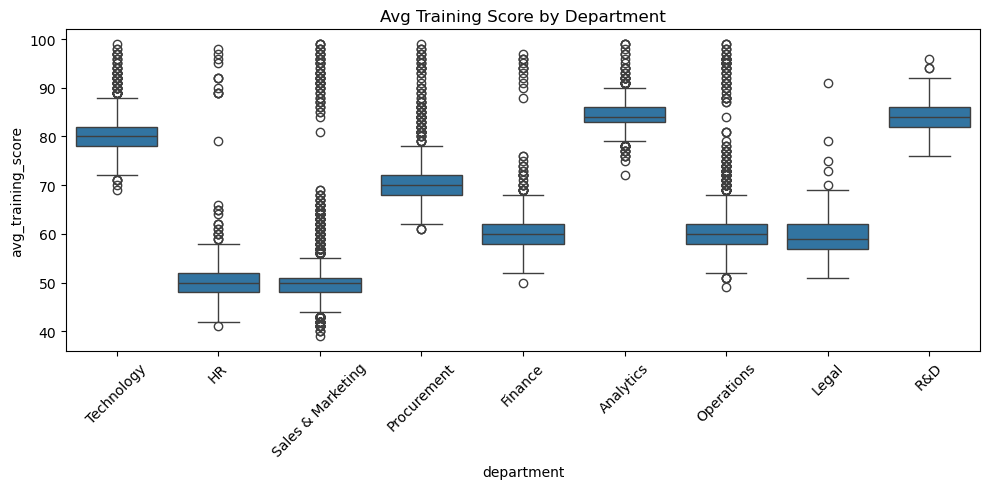

In [47]:
# Boxplot: avg_training_score vs awards_won?
sns.boxplot(x='awards_won?', y='avg_training_score', data=df)
plt.title('Avg Training Score vs Awards Won')
plt.show()

# avg_training_score vs KPIs_met >80%
sns.boxplot(x='KPIs_met >80%', y='avg_training_score', data=df)
plt.title('Avg Training Score vs KPIs Met >80%')
plt.show()

# avg_training_score vs Department
plt.figure(figsize=(10, 5))
sns.boxplot(x='department', y='avg_training_score', data=df)
plt.xticks(rotation=45)
plt.title('Avg Training Score by Department')
plt.tight_layout()
plt.show()

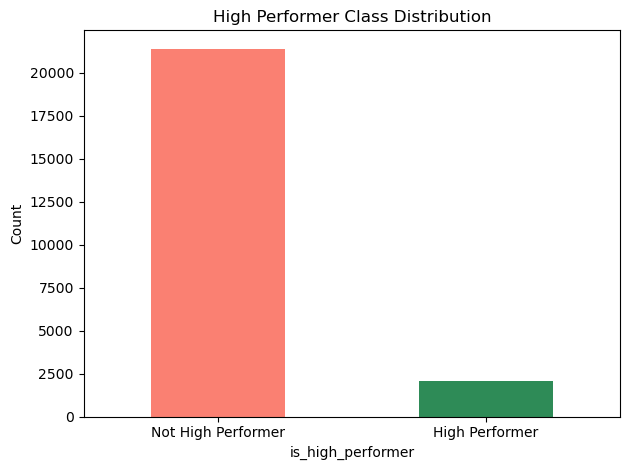

In [49]:
# Count of each class
df['is_high_performer'].value_counts().plot(kind='bar', color=['salmon', 'seagreen'])
plt.title('High Performer Class Distribution')
plt.xticks(ticks=[0,1], labels=['Not High Performer', 'High Performer'], rotation=0)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

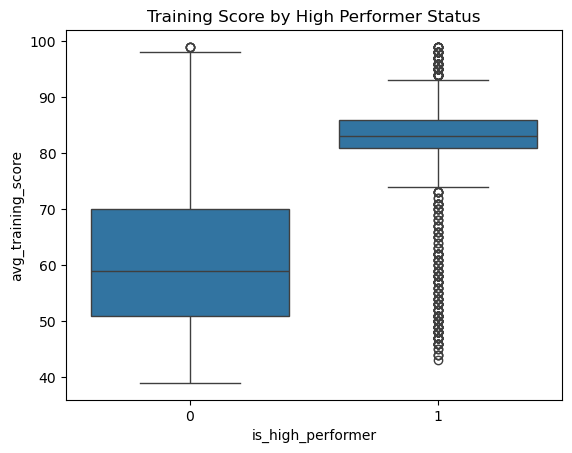

In [51]:
# Compare avg score between high and non-high performers
sns.boxplot(x='is_high_performer', y='avg_training_score', data=df)
plt.title('Training Score by High Performer Status')
plt.show()